# Detección de anomalías
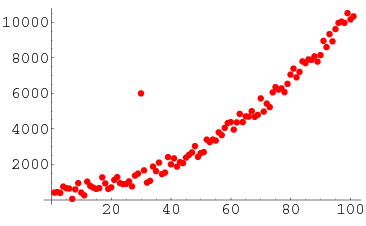

Una anomalía o *outlier* es una observación que no pertence a una cierta población. Es una muestra anormal que se aleja del resto de valores. 

Por ejemplo, si estamos midiendo la tempoeratura en Madrid y obtenemos `[20, 24, 22, 19, 29, 18, 4300, 30]`.

Es fácilmente identificable cuando las observaciones son pocas y tienen una única dimensión, pero cuando tenemos miles de observaciones multi-dimensionales, necesitamos otras formas de detectar estos valores.

**¿Por qué hay que preocuparse de los outliers?**  
Existen muchos problemas en los que es necesario encontrar valores atípicos, por ejemplo anomalías en el ritmo cardiaco para predecir enfermedades cardiovasculares; o anomalías en patrones de tráfico que permitan prevenir accidentes, entre otros.  
Otra razón por la cual necesitamos detectar anomalías es para preparar los datasets para modelos de machine learning. Es importante detectar todos los outliers, bien para deshacernos de ellos o analizarlos en profundidad.   

Por ejemplo, en el siguiente gráfico vemos como la simple presencia de un outlier puede cambiar drásticamente la correlación entre dos variables

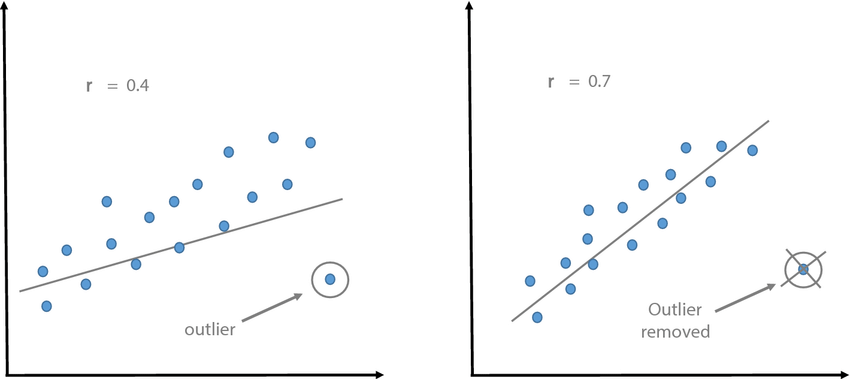

Trabajaremos con el siguiente dataset: **Boston Housing**  

Los datos de la vivienda contienen 506 secciones censales de Boston del censo de 1970. La base de datos Boston Housing contiene los datos originales de Harrison y Rubinfeld (1979), el marco de datos BostonHousing 2 es la versión corregida con información espacial adicional.  

Esta información esta incluida en la biblioteca mlbench o descargar el conjunto de datos. Los datos tienen las siguientes características, siendo medv la variable de objetivo o independiente:  

`crim` - Crimen per cápita por ciudad  
`zn` - proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados  
`indus` - proporción de acres de negocios no minoristas por ciudad  
`chas` - variable ficticia de Charles River (= 1 si el tramo limita el río, 0 de lo contrario)  
`nox` - concentración de óxidos nítricos (partes por 10 millones)  
`rm` - número promedio de habitaciones por vivienda  
`age` - proporción de unidades ocupadas por sus propietarios construidas antes de 1940  
`dis` - Distancias desproporcionadas a cinco centros de empleo de Boston  
`rad` - índice de accesibilidad a las autopistas radiales  
`tax` - tasa de impuesto a la propiedad de valor completo por USD 10,000  
`ptratio` - colegios por localidad  
`black` 1000 (B - 0,63)^ 2, donde B es la proporción de negros por ciudad  
`lstat` - porcentaje de estado inferior de la población  
`medv` - valor mediano de las viviendas ocupadas por sus propietarios en USD 1000  

In [1]:
import pandas as pd
import numpy as np

boston = pd.read_csv('https://raw.githubusercontent.com/woosubs/Intro_BayesReg/master/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
boston.shape

(506, 14)

<AxesSubplot: >

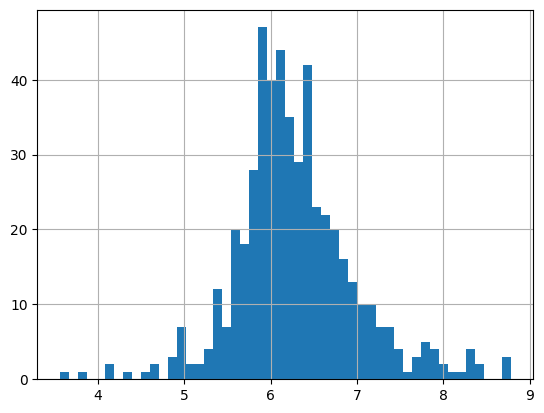

In [16]:
boston.rm.hist(bins=50)

### 1. Desviación estándar

En estadística, si una distribución se puede aproximar a una normal, entonces el 99.7% de los valores se encuentran en el intervalo de ±3 desviaciones estándar. Por tanto, los puntos que estén más alejados de 3 veces la desviación estándar, son candidatos a ser valores atípicos

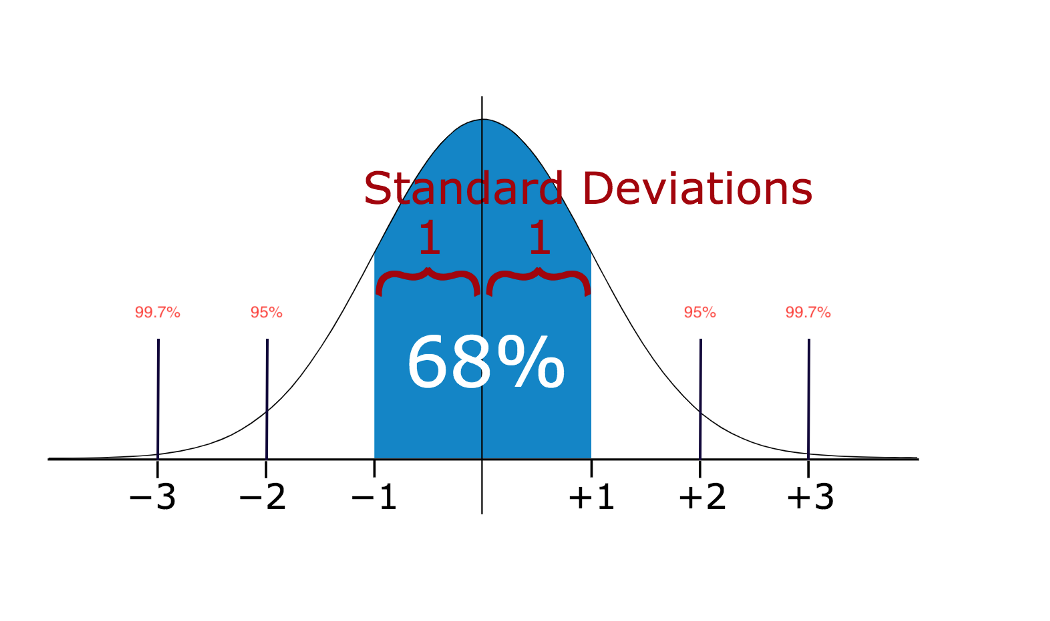



**Do it yourself**: Programa una función que reciba como entrada un array de valores y devuela los índices de los valores atípicos utilizando el método de la desviación estándar, en caso de existir. Busca los valores atípicos para las columnas del dataset

In [11]:
import numpy as np

def find_anomalies(data,factor=3):
    '''
    Devuelve el índice y el valor de las anomalías 
    siguiendo la técnica de la desviación típica
    '''
    outliers = []
    posicion = []
    
    data_mean = np.mean(data)
    data_std = np.std(data)
    anomaly_cutoff = data_std*factor
    
    lower_limit = data_mean - anomaly_cutoff
    upper_limit = data_mean + anomaly_cutoff
    
    for index,point in enumerate(data):
        if point > upper_limit or point < lower_limit:
            outliers.append(point)
            posicion.append(index)
    
    return outliers,posicion

In [14]:
for col in boston.columns:
    print(col, find_anomalies(boston[col]))
    print('\r')

crim ([88.9762, 38.3518, 41.5292, 67.9208, 51.1358, 45.7461, 73.5341, 37.6619], [380, 398, 404, 405, 410, 414, 418, 427])

zn ([90.0, 85.0, 100.0, 95.0, 95.0, 82.5, 82.5, 95.0, 95.0, 90.0, 90.0, 90.0, 85.0, 90.0], [55, 56, 57, 199, 200, 201, 202, 203, 204, 256, 283, 284, 347, 353])

indus ([], [])

chas ([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [142, 152, 154, 155, 160, 162, 163, 208, 209, 210, 211, 212, 216, 218, 219, 220, 221, 222, 234, 236, 269, 273, 274, 276, 277, 282, 283, 356, 357, 358, 363, 364, 369, 370, 372])

nox ([], [])

rm ([8.725, 8.704, 8.398, 8.78, 3.561, 3.863, 4.138, 4.138], [225, 257, 262, 364, 365, 367, 374, 406])

age ([], [])

dis ([10.7103, 10.7103, 12.1265, 10.5857, 10.5857], [351, 352, 353, 354, 355])

rad ([], [])

tax ([], [])

ptratio ([], [])

black ([70.8, 2.6, 35.05, 28.79, 27.25, 21.57, 16.45, 48.45, 2.52, 3.65, 7.68, 24.65, 18.82, 60.72, 81.33, 27.49, 9.32, 68.95, 43.06, 0.32, 6.68, 50.92

### 2. Rango intercuartílico 

Las variables no siempre siguen una distribución normal. Un buen estadístico para describir datos no gaussianos es el rango intercuartílico (IQR). Se calcula como la diferencia entre el percentil 25 y 75 de los datos, y define la caja en un gráfico de cajas.

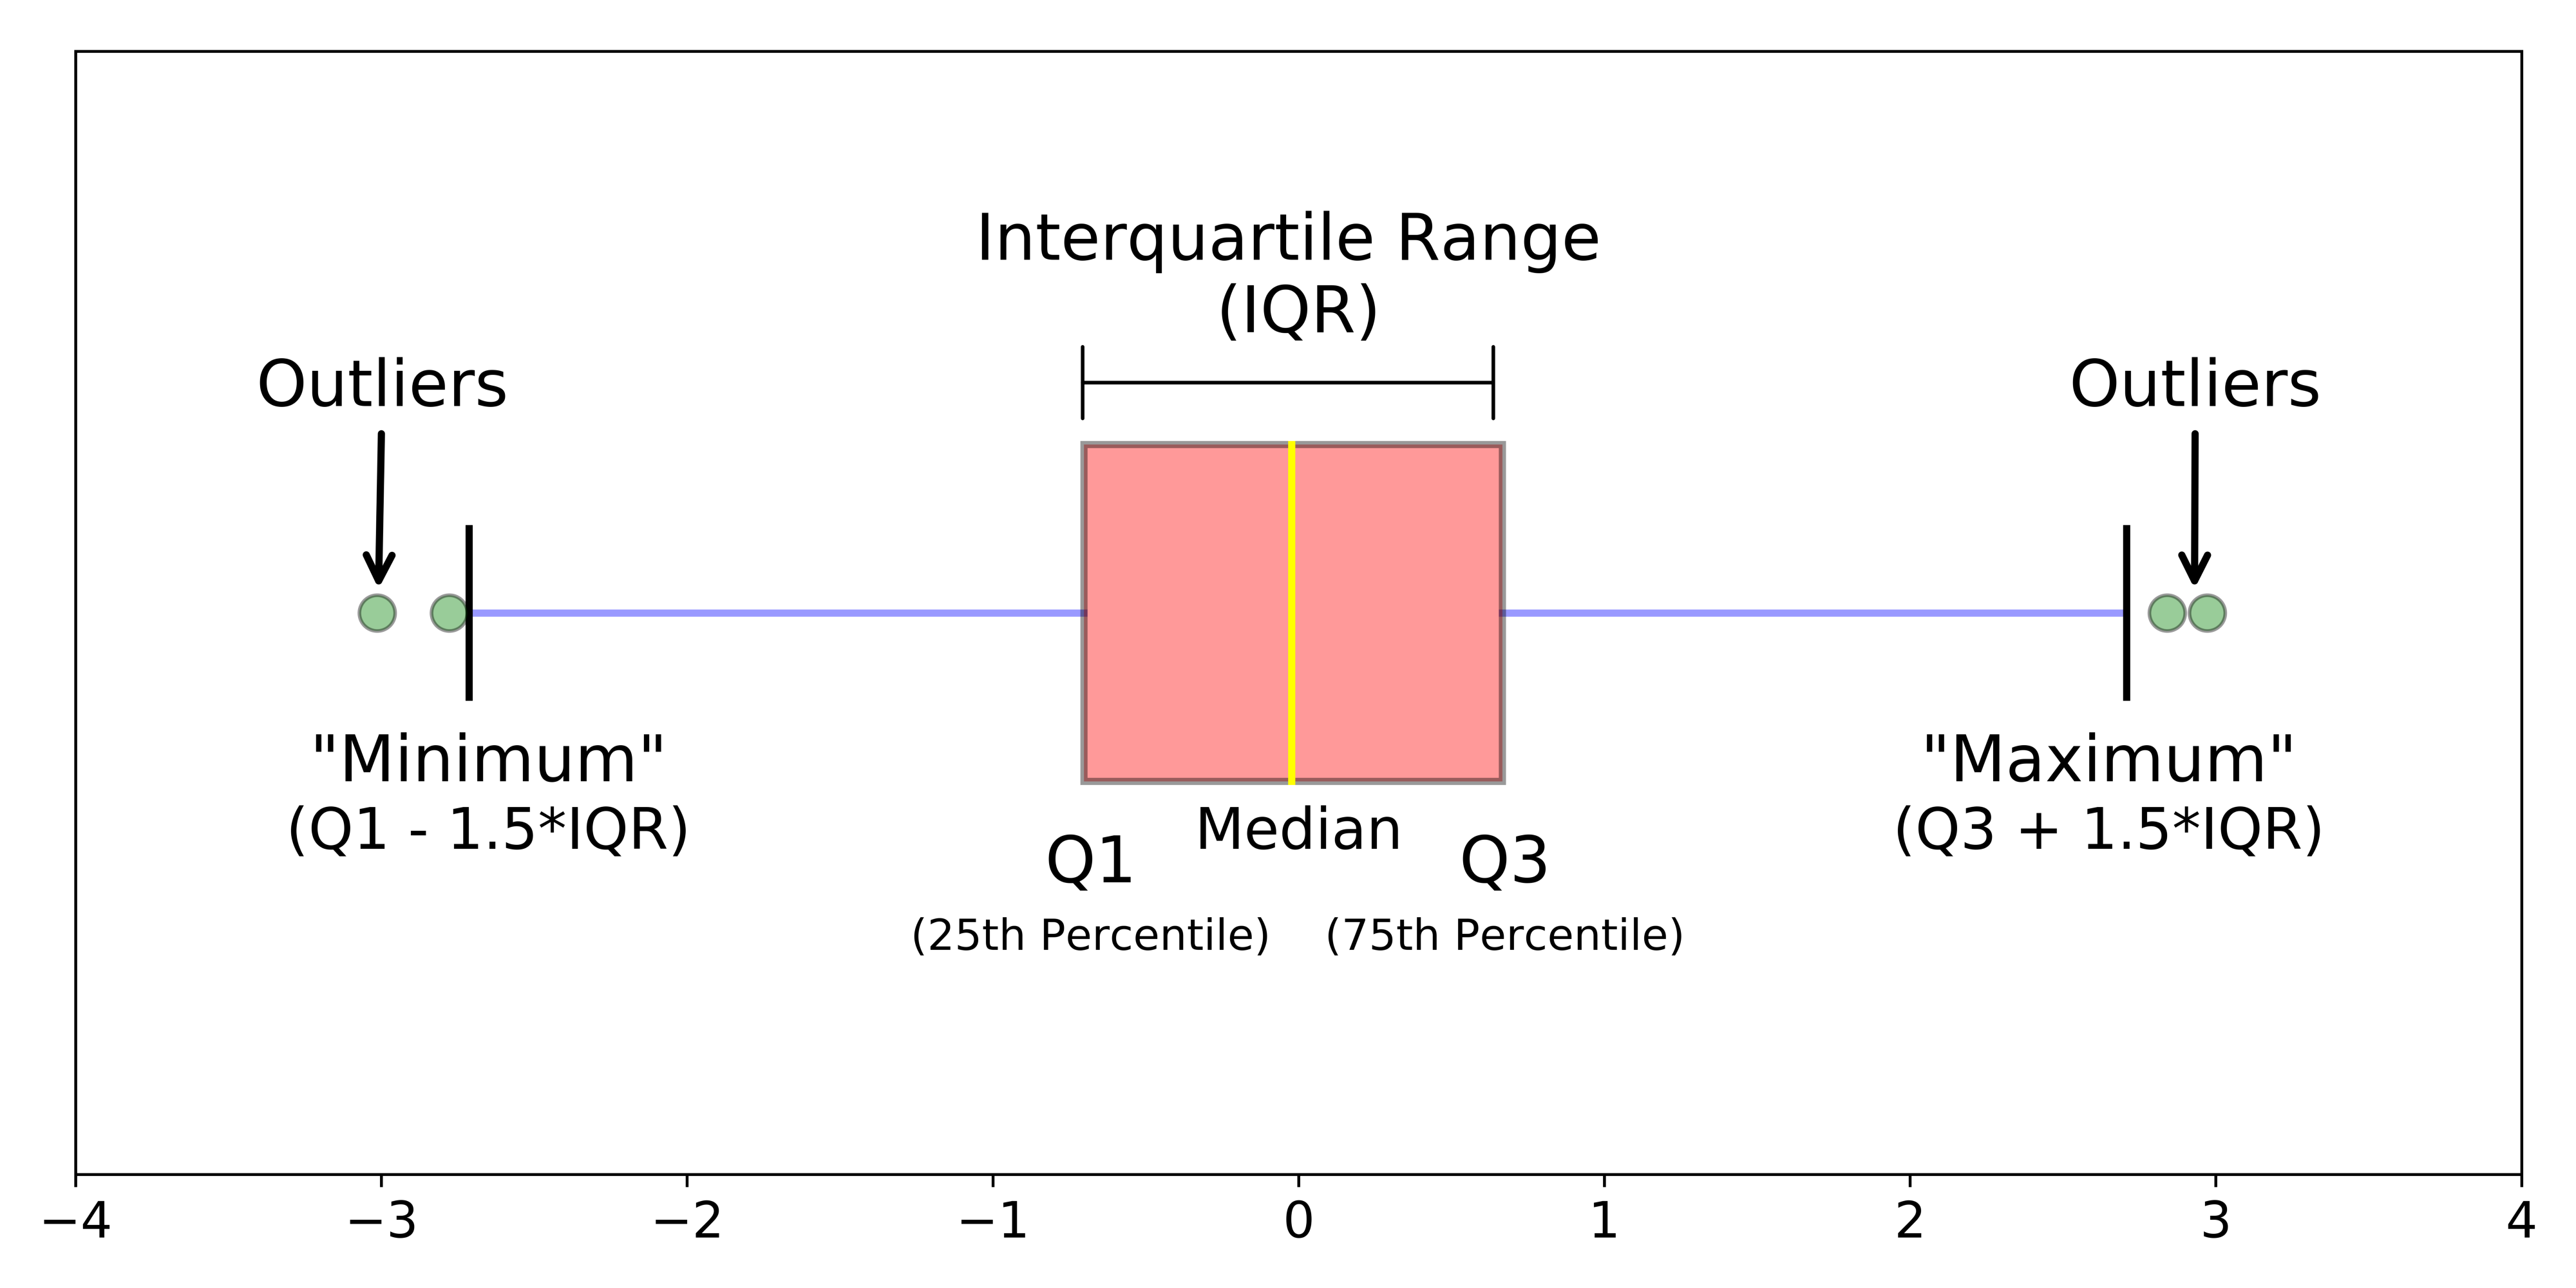

Recuerda que los percentiles se calculan ordenando las observaciones y seleccionando los valores en índices específicos. Por ejemplo, el percentil 50 (mediana) es el valor en el medio

El IQR se puede utilizar para identificar valores atípicos definiendo límites en los valores de la muestra que son un factor k del IQR por debajo del percentil 25 o por encima del percentil 75. El valor común del factor k es 1.5. Se puede usar un factor k de 3 o más para identificar valores que son valores atípicos extremos o "muy alejados" 

<AxesSubplot: >

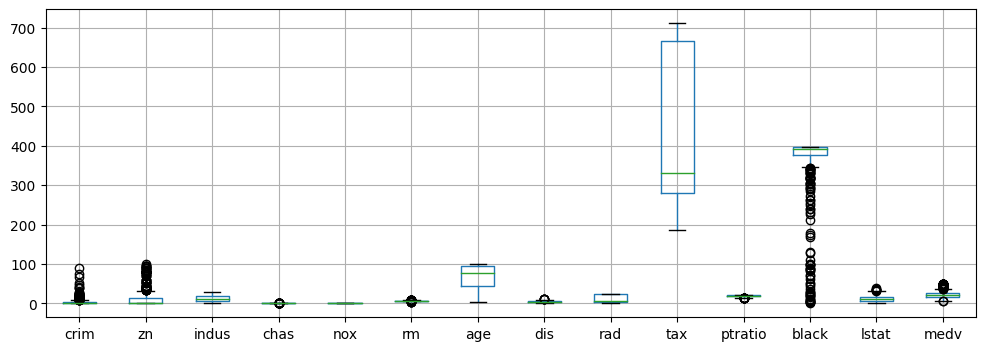

In [17]:
boston.boxplot(figsize=(12,4))

<AxesSubplot: >

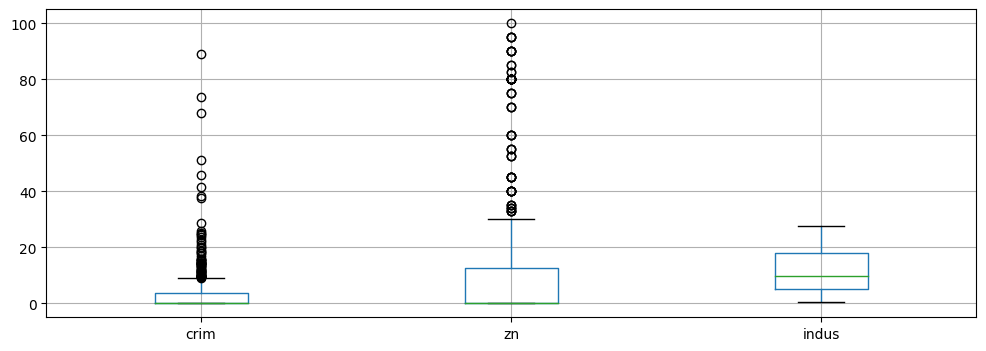

In [18]:
boston.boxplot(column=['crim','zn','indus'], figsize=(12,4))

<AxesSubplot: >

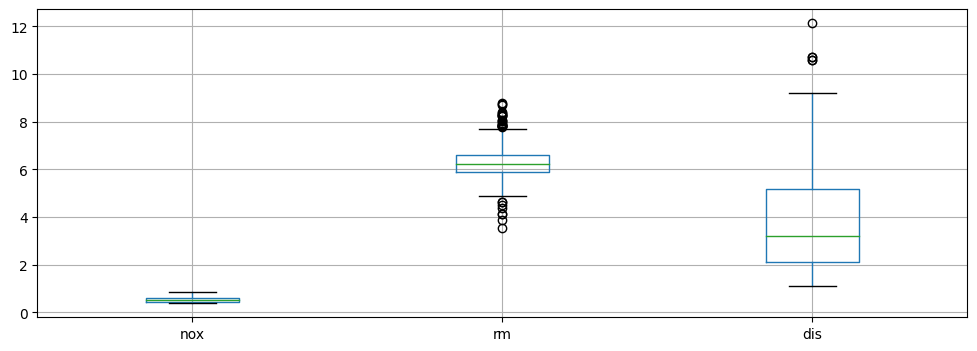

In [21]:
boston.boxplot(column=['nox','rm','dis'], figsize=(12,4))

**Do it yourself**: Programa una función que reciba como entrada un array de valores y devuelva los índices de los valores atípicos utilizando el método del rango intercuartílico. Busca los valores atípicos para las columnas del dataset
NOTA: Para calcular percentiles, utiliza `numpy.percentile`

In [24]:
def outliers_IQR(data,factor=1.5):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    
    cutoff = iqr*factor
    lower = q1-cutoff
    upper = q3+cutoff
    
    outliers = []
    posicion = []
    
    for index,value in enumerate(data):
        if value<lower or value>upper:
            outliers.append(value)
            posicion.append(index)
    
    return outliers,posicion

In [29]:
outliers_crim = outliers_IQR(boston['crim'],10)[0]
outliers_crim

[88.9762, 41.5292, 67.9208, 51.1358, 45.7461, 73.5341]

In [25]:
for col in boston.columns:
    print(col, outliers_IQR(boston[col]))
    print('\r')

crim ([13.5222, 9.2323, 11.1081, 18.4982, 19.6091, 15.288, 9.82349, 23.6482, 17.8667, 88.9762, 15.8744, 9.18702, 20.0849, 16.8118, 24.3938, 22.5971, 14.3337, 11.5779, 13.3598, 38.3518, 9.91655, 25.0461, 14.2362, 9.59571, 24.8017, 41.5292, 67.9208, 20.7162, 11.9511, 14.4383, 51.1358, 14.0507, 18.811, 28.6558, 45.7461, 18.0846, 10.8342, 25.9406, 73.5341, 11.8123, 11.0874, 12.0482, 15.8603, 12.2472, 37.6619, 9.33889, 10.0623, 13.9134, 11.1604, 14.4208, 15.1772, 13.6781, 9.39063, 22.0511, 9.72418, 9.96654, 12.8023, 10.6718, 9.92485, 9.32909, 9.51363, 15.5757, 13.0751, 15.0234, 10.233, 14.3337], [367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479])

zn ([75.0, 75.0, 75.0, 90.0, 85.0, 100.0, 80.0, 80.0, 45.0, 45.0, 45.

¿Qué hacemos con los outliers? Tenemos varias opciones: 

1) Ignorarlos  
2) Tratarlos como missing data  
3) Eliminarlos (trimming)

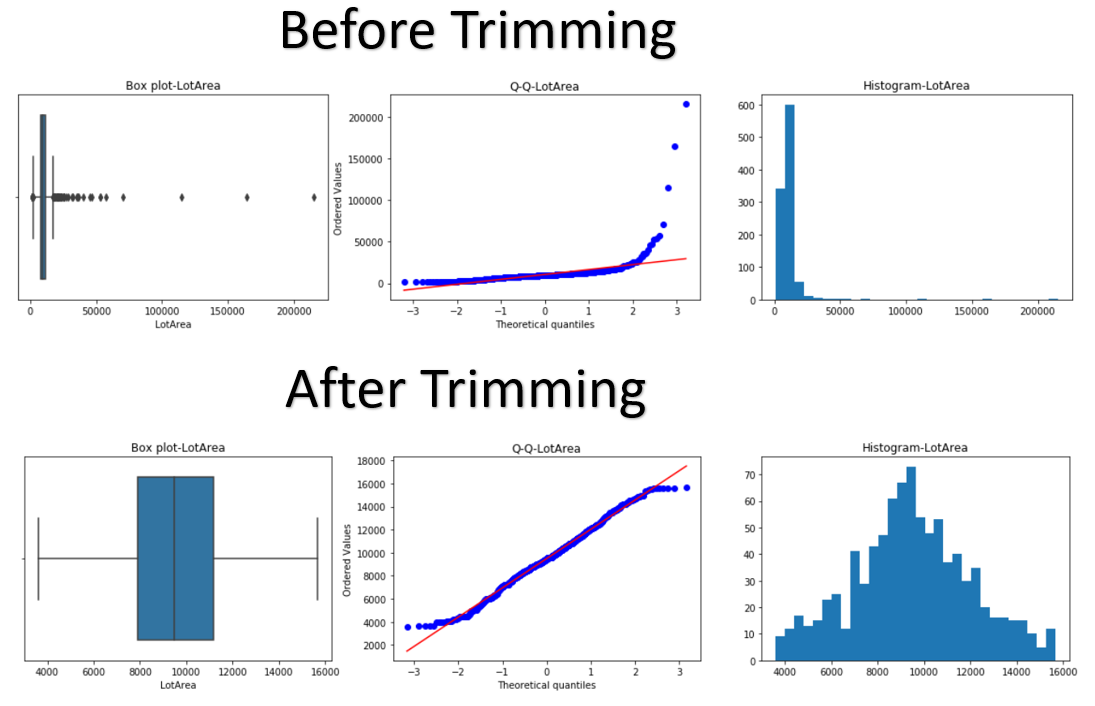